In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
import shap

from sklearn.model_selection import train_test_split 

In [2]:
train_df = pd.read_csv('./train_df.csv')
test_df = pd.read_csv('./test_df.csv')

# temporary use of 200 values for training
Y = train_df['label'][:200]
X = train_df.drop('label', axis=1)[:200]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1337, stratify = Y)

In [3]:
from sklearn.decomposition import PCA

pca = PCA(5)
# X_train = pca.fit_transform(X_train)
# X_test = pca.fit_transform(X_test)

In [4]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

y_pred = gnb.fit(X_train, Y_train).predict(X_test)


In [5]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, y_pred)


0.85

In [6]:
from sklearn.neighbors import KernelDensity
from sklearn.neighbors import KNeighborsClassifier

# todo gridsearch, try parameters

KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)

parzen = KernelDensity()
parzen.fit(X_train, Y_train)



KernelDensity()

In [7]:
accuracy_score(Y_test, KNN.predict(X_test))


0.975

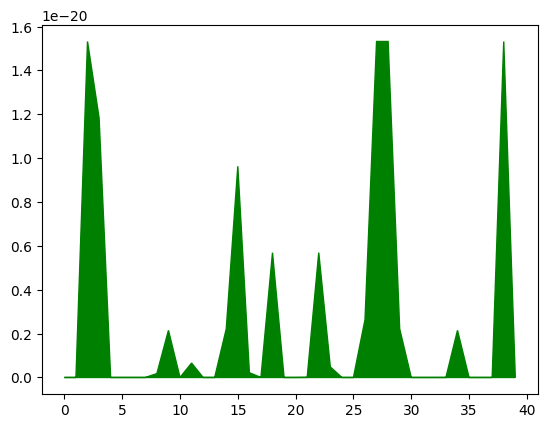

In [8]:
log_dens = parzen.score_samples(X_test)

# TODO fix
plt.fill(np.exp(log_dens), c='green')

In [9]:
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier()
clf.fit(X_train, Y_train)

accuracy_score(Y_test, clf.predict(X_test))


0.85